<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/thomasmaechler/Documents/GitHub/Case-Study-Classification'

In [3]:
df = pd.read_excel(r"creditcardmarketing.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [5]:
df.isna().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('#','no_of')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_number           17976 non-null  int64  
 1   offer_accepted            17976 non-null  object 
 2   reward                    17976 non-null  object 
 3   mailer_type               17976 non-null  object 
 4   income_level              17976 non-null  object 
 5   no_of_bank_accounts_open  17976 non-null  int64  
 6   overdraft_protection      17976 non-null  object 
 7   credit_rating             17976 non-null  object 
 8   no_of_credit_cards_held   17976 non-null  int64  
 9   no_of_homes_owned         17976 non-null  int64  
 10  household_size            17976 non-null  int64  
 11  own_your_home             17976 non-null  object 
 12  average_balance           17976 non-null  float64
 13  q1_balance                17976 non-null  float64
 14  q2_bal

In [10]:
df.drop(['customer_number'], axis = 1, inplace = True) 

In [11]:
df['offer_accepted'].value_counts()

No     16955
Yes     1021
Name: offer_accepted, dtype: int64

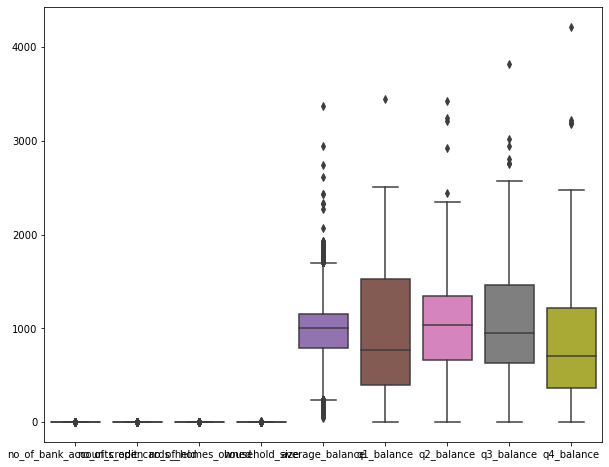

In [12]:
plt.figure(figsize = (10, 8))
#df = df.drop(['customer_number'], axis=1, inplace=True)
df.head()
sns.boxplot(data=df);

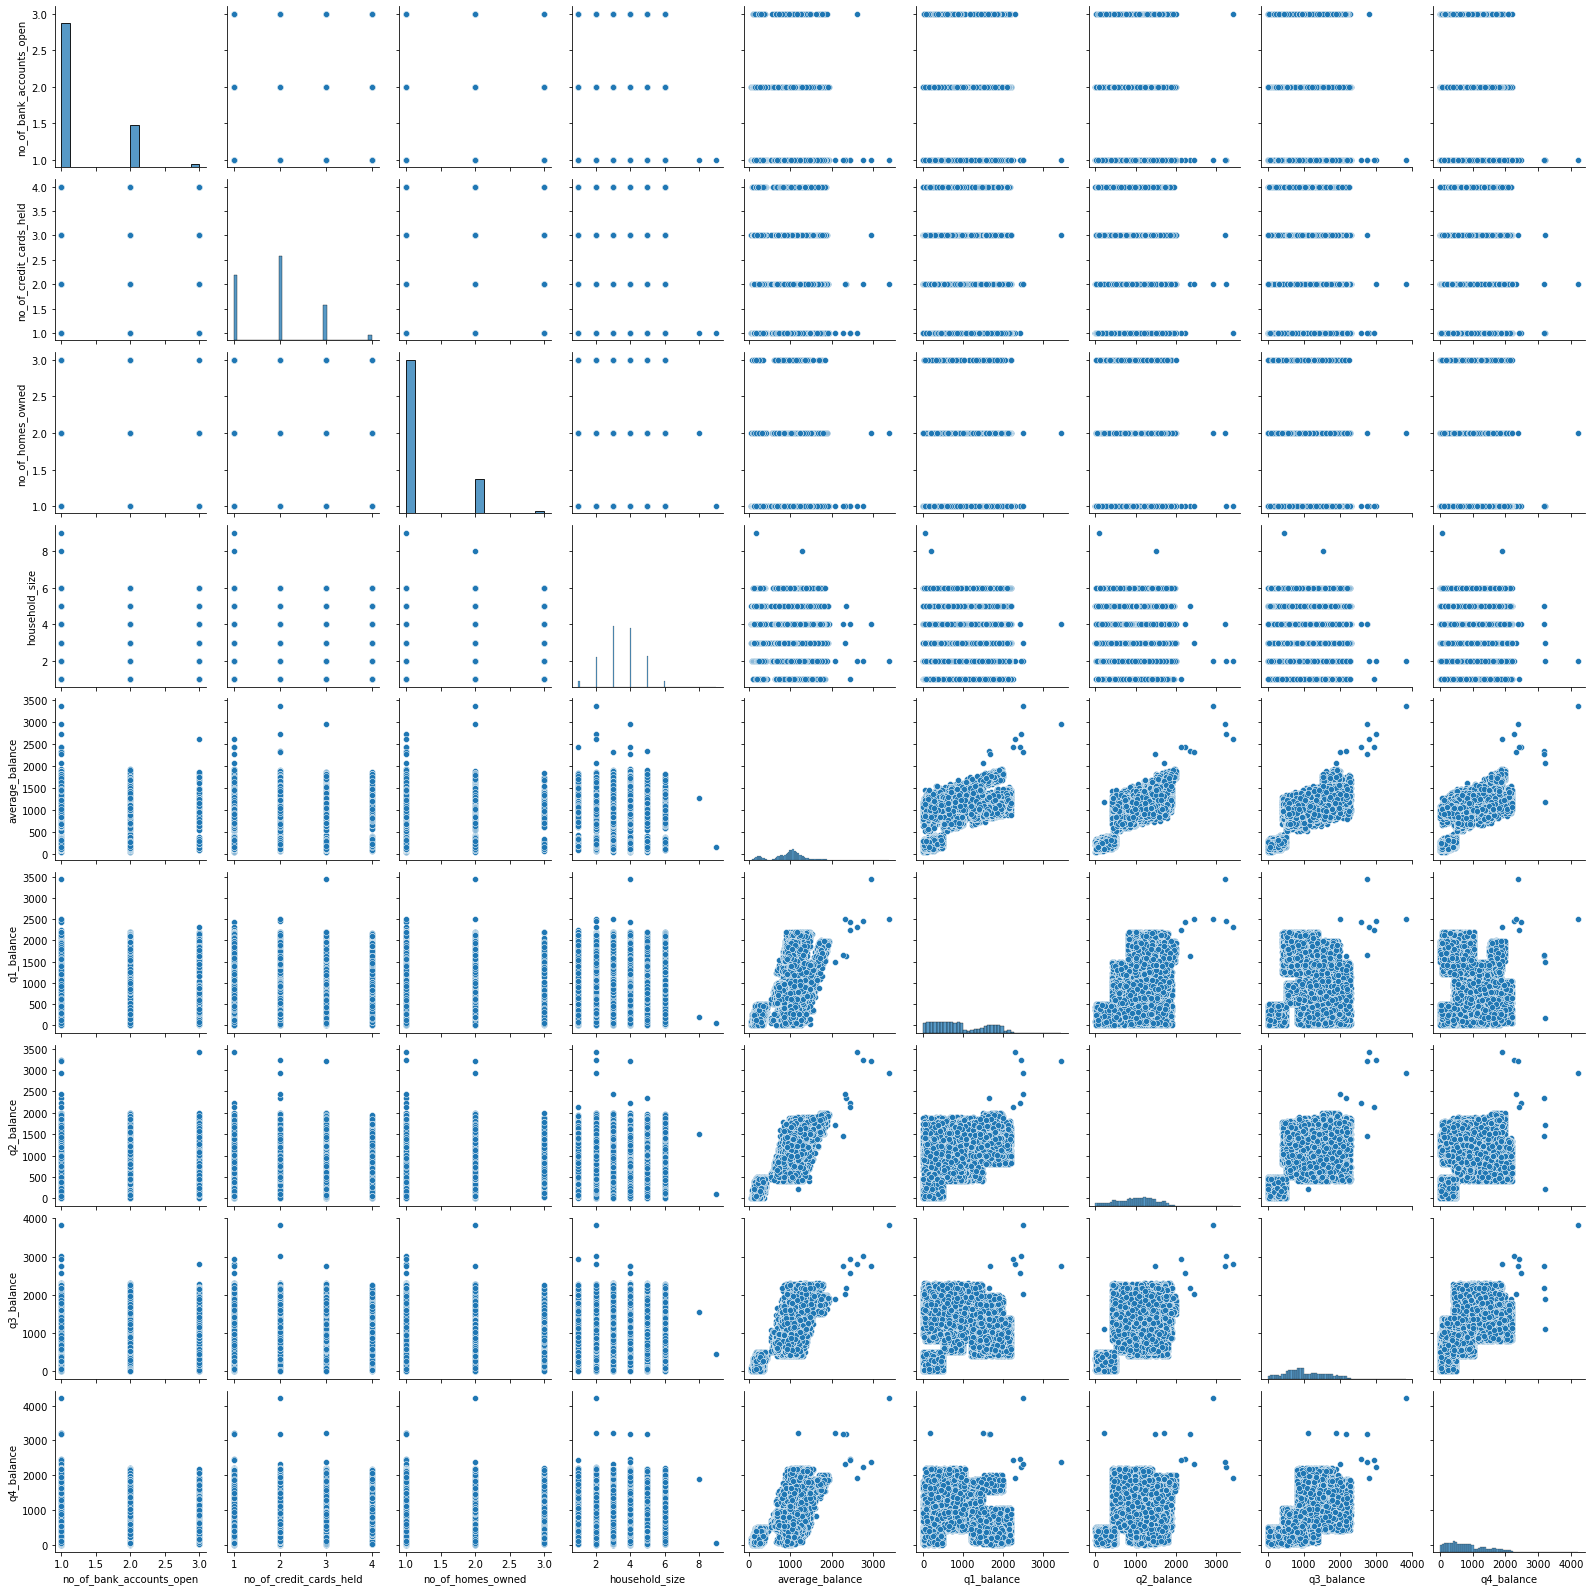

In [13]:
sns.pairplot(df);

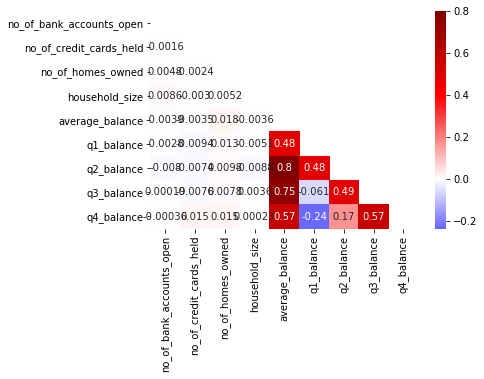

In [14]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df.corr(),
           annot=True,
           center=0,
           mask=mask,
           cmap='seismic')
plt.show();

In [15]:
df.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance','no_of_homes_owned'], axis = 1, inplace = True) 

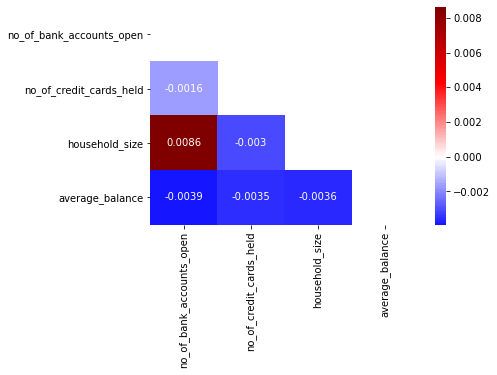

In [16]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df.corr(),
           annot=True,
           center=0,
           mask=mask,
           cmap='seismic')
plt.show();

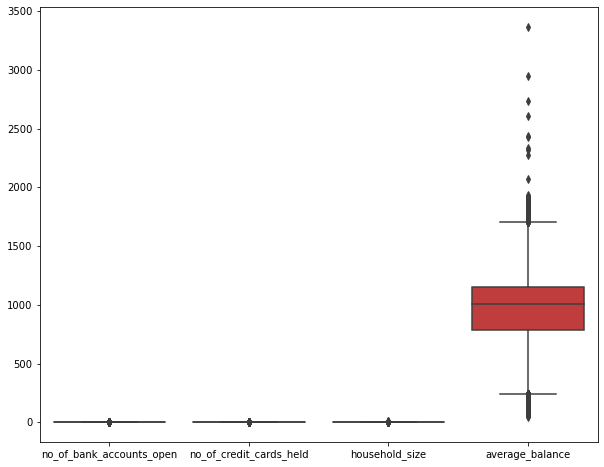

In [17]:
plt.figure(figsize = (10, 8))
#df = df.drop(['customer_number'], axis=1, inplace=True)
df.head()
sns.boxplot(data=df);

In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [20]:
#spilting data into numerical and categorical

In [21]:
import numpy as np
from sklearn.preprocessing import Normalizer

X = df.select_dtypes(include = np.number)

In [22]:
X.head()

no_of_bank_accounts_open  no_of_credit_cards_held  household_size  \
0                         1                        2               4   
1                         1                        2               5   
2                         2                        2               2   
3                         2                        1               4   
4                         1                        2               6   

   average_balance  
0          1160.75  
1           147.25  
2           276.50  
3          1219.00  
4          1211.00

In [23]:
transformer = Normalizer()
transformer.fit(X)
x_normalized = transformer.transform(X)

In [24]:
x = pd.DataFrame(x_normalized, columns=X.columns)

In [25]:
x

no_of_bank_accounts_open  no_of_credit_cards_held  household_size  \
0                      0.000862                 0.001723        0.003446   
1                      0.006786                 0.013573        0.033932   
2                      0.007233                 0.007233        0.007233   
3                      0.001641                 0.000820        0.003281   
4                      0.000826                 0.001652        0.004955   
...                         ...                      ...             ...   
17971                  0.005967                 0.005967        0.029836   
17972                  0.001176                 0.003527        0.003527   
17973                  0.000920                 0.001839        0.003679   
17974                  0.000978                 0.003913        0.001956   
17975                  0.001894                 0.001894        0.002841   

       average_balance  
0             0.999992  
1             0.999309  
2             0.999922  
3             0.999993  
4             0.999986  
...                ...  
17971         0.999519  
17972         0.999987  
17973         0.999991  
17974         0.999990  
17975         0.999992  

[17976 rows x 4 columns]

In [26]:
cat = df.select_dtypes(include = np.object)

<ipython-input-26-3fa415461a28>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = df.select_dtypes(include = np.object)


In [27]:
cat

offer_accepted     reward mailer_type income_level overdraft_protection  \
0                 No  Air Miles      Letter         High                   No   
1                 No  Air Miles      Letter       Medium                   No   
2                 No  Air Miles    Postcard         High                   No   
3                 No  Air Miles      Letter       Medium                   No   
4                 No  Air Miles      Letter       Medium                   No   
...              ...        ...         ...          ...                  ...   
17971             No  Cash Back      Letter         High                   No   
17972             No  Cash Back      Letter         High                   No   
17973             No  Cash Back      Letter         High                   No   
17974             No  Cash Back      Letter       Medium                   No   
17975             No  Cash Back      Letter          Low                   No   

      credit_rating own_your_home  
0              High            No  
1            Medium           Yes  
2            Medium           Yes  
3              High            No  
4            Medium           Yes  
...             ...           ...  
17971           Low           Yes  
17972           Low           Yes  
17973           Low            No  
17974        Medium           Yes  
17975        Medium            No  

[17976 rows x 7 columns]

In [28]:
cat = cat.drop(['offer_accepted'], axis=1)

In [29]:
cat.head()

reward mailer_type income_level overdraft_protection credit_rating  \
0  Air Miles      Letter         High                   No          High   
1  Air Miles      Letter       Medium                   No        Medium   
2  Air Miles    Postcard         High                   No        Medium   
3  Air Miles      Letter       Medium                   No          High   
4  Air Miles      Letter       Medium                   No        Medium   

  own_your_home  
0            No  
1           Yes  
2           Yes  
3            No  
4           Yes

In [30]:
categorical = pd.get_dummies(cat,
               drop_first=True,
               columns=['reward', 'mailer_type', 'income_level', 'overdraft_protection', 'credit_rating', 'own_your_home'])

In [31]:
##  Modelling- candidate model 1 with Log Reg

In [32]:
categorical.head()

reward_Cash Back  reward_Points  mailer_type_Postcard  income_level_Low  \
0                 0              0                     0                 0   
1                 0              0                     0                 0   
2                 0              0                     1                 0   
3                 0              0                     0                 0   
4                 0              0                     0                 0   

   income_level_Medium  overdraft_protection_Yes  credit_rating_Low  \
0                    0                         0                  0   
1                    1                         0                  0   
2                    0                         0                  0   
3                    1                         0                  0   
4                    1                         0                  0   

   credit_rating_Medium  own_your_home_Yes  
0                     0                  0  
1                     1                  1  
2                     1                  1  
3                     0                  0  
4                     1                  1

In [33]:
y = df['offer_accepted']

In [34]:
y

0        No
1        No
2        No
3        No
4        No
         ..
17971    No
17972    No
17973    No
17974    No
17975    No
Name: offer_accepted, Length: 17976, dtype: object

In [35]:
len(x), len(y), len(df), len(categorical)

(17976, 17976, 17976, 17976)

In [36]:
X_full= pd.concat([x,categorical],axis=1)

In [37]:
X_full.head()

no_of_bank_accounts_open  no_of_credit_cards_held  household_size  \
0                  0.000862                 0.001723        0.003446   
1                  0.006786                 0.013573        0.033932   
2                  0.007233                 0.007233        0.007233   
3                  0.001641                 0.000820        0.003281   
4                  0.000826                 0.001652        0.004955   

   average_balance  reward_Cash Back  reward_Points  mailer_type_Postcard  \
0         0.999992                 0              0                     0   
1         0.999309                 0              0                     0   
2         0.999922                 0              0                     1   
3         0.999993                 0              0                     0   
4         0.999986                 0              0                     0   

   income_level_Low  income_level_Medium  overdraft_protection_Yes  \
0                 0                    0                         0   
1                 0                    1                         0   
2                 0                    0                         0   
3                 0                    1                         0   
4                 0                    1                         0   

   credit_rating_Low  credit_rating_Medium  own_your_home_Yes  
0                  0                     0                  0  
1                  0                     1                  1  
2                  0                     1                  1  
3                  0                     0                  0  
4                  0                     1                  1

In [38]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_bank_accounts_open  17976 non-null  float64
 1   no_of_credit_cards_held   17976 non-null  float64
 2   household_size            17976 non-null  float64
 3   average_balance           17976 non-null  float64
 4   reward_Cash Back          17976 non-null  uint8  
 5   reward_Points             17976 non-null  uint8  
 6   mailer_type_Postcard      17976 non-null  uint8  
 7   income_level_Low          17976 non-null  uint8  
 8   income_level_Medium       17976 non-null  uint8  
 9   overdraft_protection_Yes  17976 non-null  uint8  
 10  credit_rating_Low         17976 non-null  uint8  
 11  credit_rating_Medium      17976 non-null  uint8  
 12  own_your_home_Yes         17976 non-null  uint8  
dtypes: float64(4), uint8(9)
memory usage: 719.9 KB


In [39]:
from sklearn.linear_model import LogisticRegression #model
from sklearn.model_selection import train_test_split # tt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # eval
from sklearn.metrics import classification_report #eval
from sklearn.metrics import accuracy_score #eval

In [40]:
# define the model 
lr=LogisticRegression(max_iter=400)

In [41]:
#seed 
X_train, X_test, y_train, y_test=train_test_split(X_full,y, test_size=0.3, random_state=40)

In [42]:
#fit the model to our training data set 
lr.fit(X_train,y_train)

LogisticRegression(max_iter=400)

## Evaluating candidate model 1 

In [43]:
y_pred=lr.predict(X_test)
# for our test data make some pred of y (using the trained model)

In [44]:
accuracy_score(y_test,y_pred)
# comparing each actual y to each pred y for the test data set 

0.9415909512330799

In [45]:
# we were right 88% of the time in classifying our status 
confusion_matrix(y_test,y_pred)

array([[5078,    0],
       [ 315,    0]])

In [46]:
from sklearn.metrics import plot_confusion_matrix 

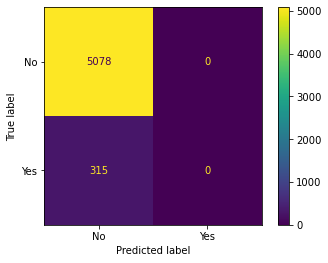

In [47]:
plot_confusion_matrix(lr, X_test, y_test)

In [48]:
cnfmat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test), 
                     index=np.unique(y_test))
df_cm

No  Yes
No   5078    0
Yes   315    0

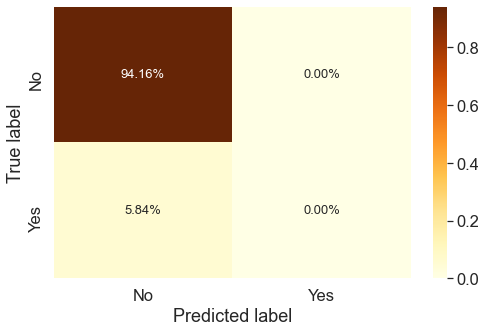

In [49]:
# set the names of the axis for the confusion matrix
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# setting the fontsize of the plot
sns.set(font_scale=1.5)

#setting the plot size
fig, ax = plt.subplots(figsize = (8,5))

sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='YlOrBr',
            annot_kws = {'size':13}
           );

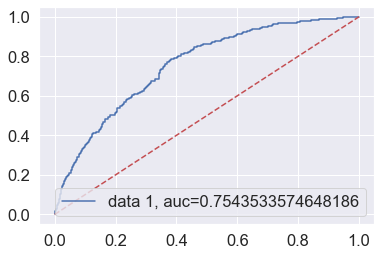

In [50]:
# AUC -
import sklearn.metrics as metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r--')          # add the red line to the middle of the plot
plt.legend(loc=4)
plt.show()

## Evaluating candidate model 2 KNN

In [51]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [52]:
s_c=StandardScaler() 
X_scaled=s_c.fit_transform(X)

In [53]:
X_scaled

array([[-0.54135164,  0.12116118,  0.44945233,  0.62872373],
       [-0.54135164,  0.12116118,  1.34675964, -2.26460898],
       [ 1.575537  ,  0.12116118, -1.3451623 , -1.89562699],
       ...,
       [-0.54135164,  0.12116118,  0.44945233,  0.41889645],
       [-0.54135164,  2.6303702 , -1.3451623 ,  0.2333349 ],
       [ 1.575537  ,  0.12116118, -0.44785499,  0.32968417]])

In [54]:
Knn=KNeighborsClassifier(n_neighbors=2,p=2)

In [55]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [56]:
y_pred=Knn.predict(X_test)

In [57]:
y.value_counts()

No     16955
Yes     1021
Name: offer_accepted, dtype: int64

In [58]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [59]:
c_m=confusion_matrix(y_test,y_pred)
c_m

array([[5056,   22],
       [ 311,    4]])

In [60]:
accuracy_score(y_test,y_pred)

0.9382532913035416

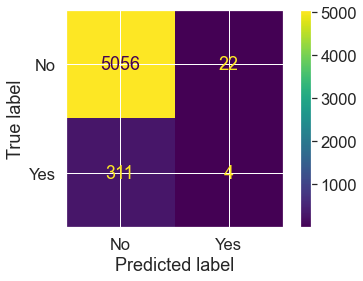

In [61]:
plot_confusion_matrix(Knn, X_test, y_test)

In [62]:
# confusion matrix
cnfmat = confusion_matrix(y_test, y_pred)

In [63]:
# setting up a dataframe for the confusion matrix
df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test), 
                     index=np.unique(y_test))
df_cm

No  Yes
No   5056   22
Yes   311    4

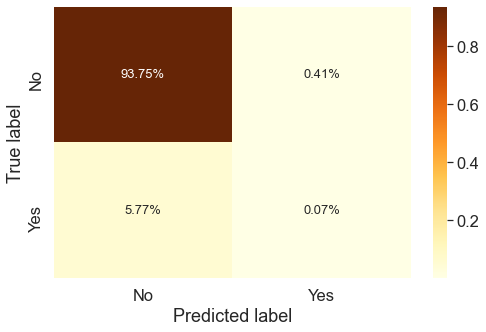

In [64]:
# set the names of the axis for the confusion matrix
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# setting the fontsize of the plot
sns.set(font_scale=1.5)

#setting the plot size
fig, ax = plt.subplots(figsize = (8,5))

sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='YlOrBr',
            annot_kws = {'size':13}
           );

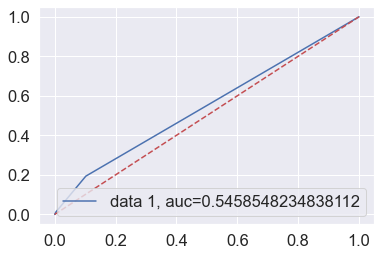

In [65]:
# AUC -
import sklearn.metrics as metrics
y_pred_proba = Knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r--')          # add the red line to the middle of the plot
plt.legend(loc=4)
plt.show()

In [66]:
y_test.head()

9212      No
17758    Yes
13196     No
15797     No
6024      No
Name: offer_accepted, dtype: object

## Evaluating candidate model 3 SMOTE

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [68]:
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

In [69]:
lr.fit(X_train_sm,y_train_sm)

LogisticRegression(max_iter=400)

In [70]:
y_pred_sm = lr.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred_sm)

0.6768032634897089

In [72]:
cnfmat_sm=confusion_matrix(y_test,y_pred_sm)

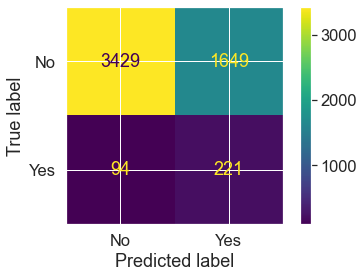

In [73]:
plot_confusion_matrix(lr,X_test,y_test)

In [74]:
cnfmat_sm= confusion_matrix(y_test, y_pred)
# setting up a dataframe for the confusion matrix
df_sm = pd.DataFrame(cnfmat_sm, columns=np.unique(y_test), 
                     index=np.unique(y_test))
df_sm

No  Yes
No   5056   22
Yes   311    4

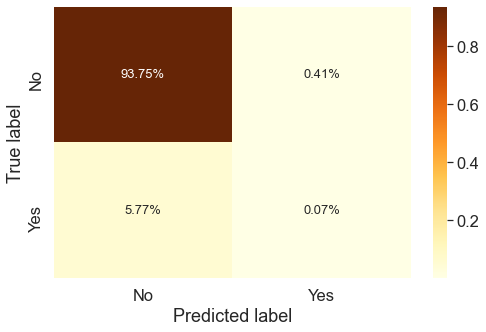

In [75]:
# set the names of the axis for the confusion matrix
df_sm.index.name = 'True label'
df_sm.columns.name = 'Predicted label'

# setting the fontsize of the plot
sns.set(font_scale=1.5)

#setting the plot size
fig, ax = plt.subplots(figsize = (8,5))

sns.heatmap(df_sm/df_sm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='YlOrBr',
            annot_kws = {'size':13}
           );

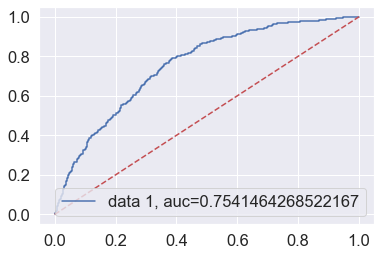

In [76]:
# AUC -
import sklearn.metrics as metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r--')          # add the red line to the middle of the plot
plt.legend(loc=4)
plt.show()

Min Max - kept - 